In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [63]:
df = pd.read_csv("starbucks_colored_sticker.csv")
df.Date = [pd.Timestamp(f"2021-{x[0]}-{x[2:4]}") for x in df.Date]
df_mean = df.groupby(df.Date).mean()

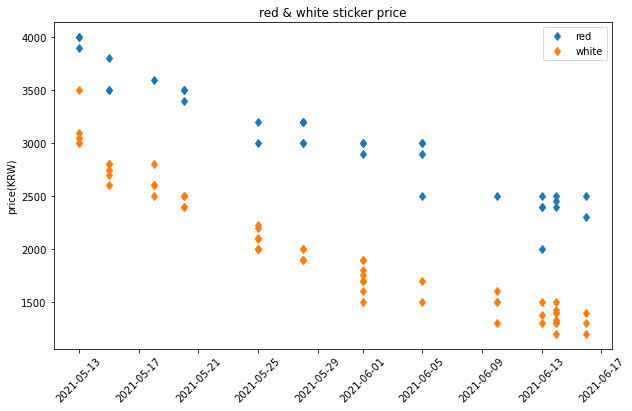

In [99]:
fig = plt.figure(figsize=(10, 6))
plt.plot(df.Date, df["빨강"], 'd', label="red")
plt.plot(df.Date, df["하양"], 'd', label='white')
plt.xticks(rotation=45)
plt.legend()
# plt.xlabel("date")
plt.title("")
plt.ylabel("price(KRW)")
plt.title("red & white sticker price")
plt.savefig('price.png', facecolor='white', edgecolor='none')

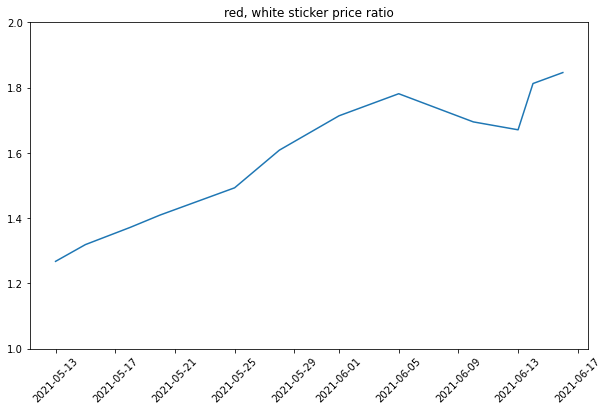

In [100]:
fig = plt.figure(figsize=(10, 6))
plt.title("red, white sticker price ratio")
plt.plot(df_mean.index, df_mean["빨강"] / df_mean["하양"])
plt.ylim(1, 2)
plt.xticks(rotation=45)
plt.savefig('price_ratio.png', facecolor='white', edgecolor='none')

In [74]:
df_ticket = pd.read_csv("starbucks_exchange_tiecket.csv")
df_ticket.Date = [pd.Timestamp(f"2021-{x[0]}-{x[2:4]}") for x in df_ticket.Date]
df_ticket_mean = df_ticket.groupby(df_ticket.Date).mean()

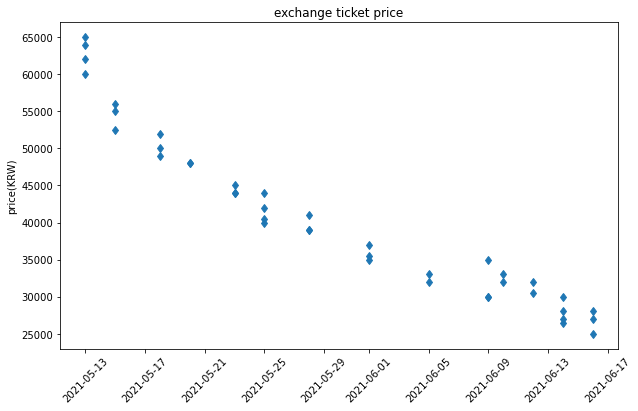

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(df_ticket.Date, df_ticket["가격"], 'd')
plt.title("exchange ticket price")
plt.ylabel("price(KRW)")
plt.xticks(rotation=45)
plt.savefig('ticket_price.png', facecolor='white', edgecolor='none')

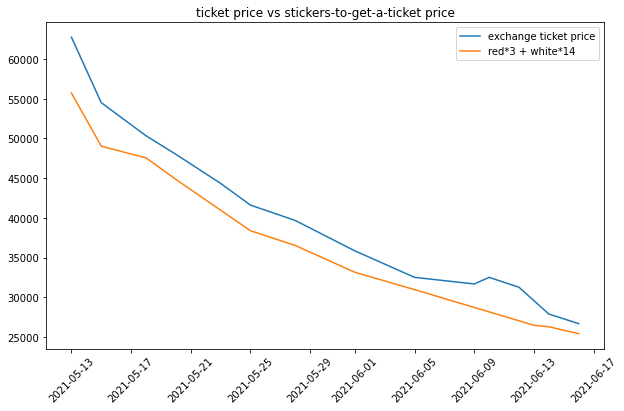

In [102]:
plt.figure(figsize=(10, 6))

plt.plot(df_ticket_mean, label="exchange ticket price")
plt.plot(df_mean["빨강"]*3+df_mean["하양"]*14, label="red*3 + white*14")
plt.legend()
plt.xticks(rotation=45)
plt.title("exchange ticke")
plt.title("ticket price vs stickers-to-get-a-ticket price")
plt.savefig('ticket price vs stickers-to-get-a-ticket price.png', facecolor='white', edgecolor='none')

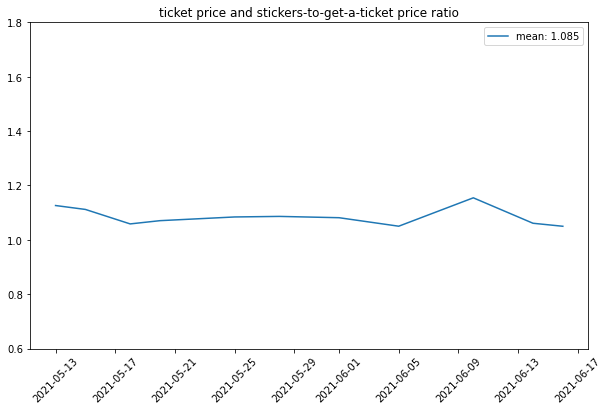

In [103]:
# df_merge1 = df_ticket_mean
index_set = set(df_ticket_mean.index.values)
index_set = index_set.intersection(df_mean.index.values)
index_list = sorted(index_set)
df_merged = pd.concat([df.loc[index_list, :] for df in [df_ticket_mean, df_mean]], axis=1)

price_calc_by_sticker = df_merged["빨강"]*3 + df_merged["하양"]*14
price_exchange_ticket = df_merged["가격"]

plt.figure(figsize=(10, 6))
result =price_exchange_ticket / price_calc_by_sticker
plt.plot(result, label=f"mean: {round(np.mean(result), 3)}")
plt.ylim(0.6, 1.8)
plt.legend()
plt.xticks(rotation=45)
plt.title("ticket price and stickers-to-get-a-ticket price ratio")
plt.savefig('ticket price and stickers-to-get-a-ticket price ratio.png', facecolor='white', edgecolor='none')